### **Question 1: Extracting Tesla Stock Data Using yfinance (2 Points)**


In [2]:
# Import yfinance library
import yfinance as yf

# Download Tesla stock data
tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="max")

# Reset the index
tesla_data.reset_index(inplace=True)

# Display the first 5 rows
tesla_data.head()


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


### **Question 2: Extracting Tesla Revenue Data Using Webscraping (1 Point)**

In [4]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

# Get the HTML content
url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
html_data = requests.get(url).text

# Parse HTML with BeautifulSoup
soup = BeautifulSoup(html_data, "html.parser")

# Find all tables
tables = soup.find_all("table")

# Find the correct revenue table
tesla_revenue = pd.DataFrame(columns=["Date", "Revenue"])

for table in tables:
    if "Tesla Quarterly Revenue" in table.text:
        for row in table.tbody.find_all("tr"):
            cols = row.find_all("td")
            if len(cols) == 2:
                date = cols[0].text.strip()
                revenue = cols[1].text.strip().replace("$", "").replace(",", "")
                if revenue != "":
                    tesla_revenue = tesla_revenue.append({"Date": date, "Revenue": revenue}, ignore_index=True)
        break

# Display the last five rows
print(tesla_revenue.tail())


Empty DataFrame
Columns: [Date, Revenue]
Index: []


### **Question 3: Extracting GameStop Stock Data Using yfinance**

In [5]:
# Import necessary libraries
import yfinance as yf
import pandas as pd

# Download GME (GameStop) stock data
gme_data = yf.download("GME", start="2010-01-01", end="2023-12-31")

# Reset the index
gme_data.reset_index(inplace=True)

# Display the first five rows
print(gme_data.head())


C:\Users\aws12\AppData\Local\Temp\ipykernel_15240\2278307003.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  gme_data = yf.download("GME", start="2010-01-01", end="2023-12-31")
[*********************100%***********************]  1 of 1 completed

Price        Date     Close      High       Low      Open     Volume
Ticker                  GME       GME       GME       GME        GME
0      2010-01-04  3.854644  3.863060  3.703151  3.714934   26702800
1      2010-01-05  3.959007  3.996038  3.854645  3.856329   21269600
2      2010-01-06  4.044851  4.056634  3.908508  3.948906   21471200
3      2010-01-07  3.443930  3.563441  3.268873  3.368184  164761200
4      2010-01-08  3.415314  3.573539  3.405214  3.474228   47872400


### **Question 4: Extracting GameStop Revenue Data Using Webscraping**

In [13]:
import requests
import pandas as pd
from bs4 import BeautifulSoup

# Step 1: Define URL and headers to simulate a browser
url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64)"
}

# Step 2: Get the HTML content using requests
response = requests.get(url, headers=headers)

# Step 3: Use BeautifulSoup to parse the HTML
soup = BeautifulSoup(response.text, "html.parser")

# Step 4: Locate the correct table (search by class or structure)
tables = soup.find_all("table")

# Step 5: Find the table with "GameStop Quarterly Revenue"
for table in tables:
    if "GameStop Quarterly Revenue" in table.text:
        revenue_table = table
        break
else:
    raise ValueError("Revenue table not found.")

# Step 6: Convert the table to a dataframe using pandas
df = pd.read_html(str(revenue_table))[0]

# Step 7: Clean the dataframe
df.columns = ["Date", "Revenue"]
df["Revenue"] = df["Revenue"].astype(str).str.replace(r"[\$,]", "", regex=True)
df = df[df["Revenue"] != ""]
df["Revenue"] = df["Revenue"].astype(float)

# Display last 5 rows
print(df.tail())

# Optional: assign to variable for dashboard
gme_revenue = df


          Date  Revenue
60  2010-01-31   3524.0
61  2009-10-31   1835.0
62  2009-07-31   1739.0
63  2009-04-30   1981.0
64  2009-01-31   3492.0


C:\Users\aws12\AppData\Local\Temp\ipykernel_15240\1997313266.py:29: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(revenue_table))[0]


### **Question 5: Plot Tesla Stock Graph**

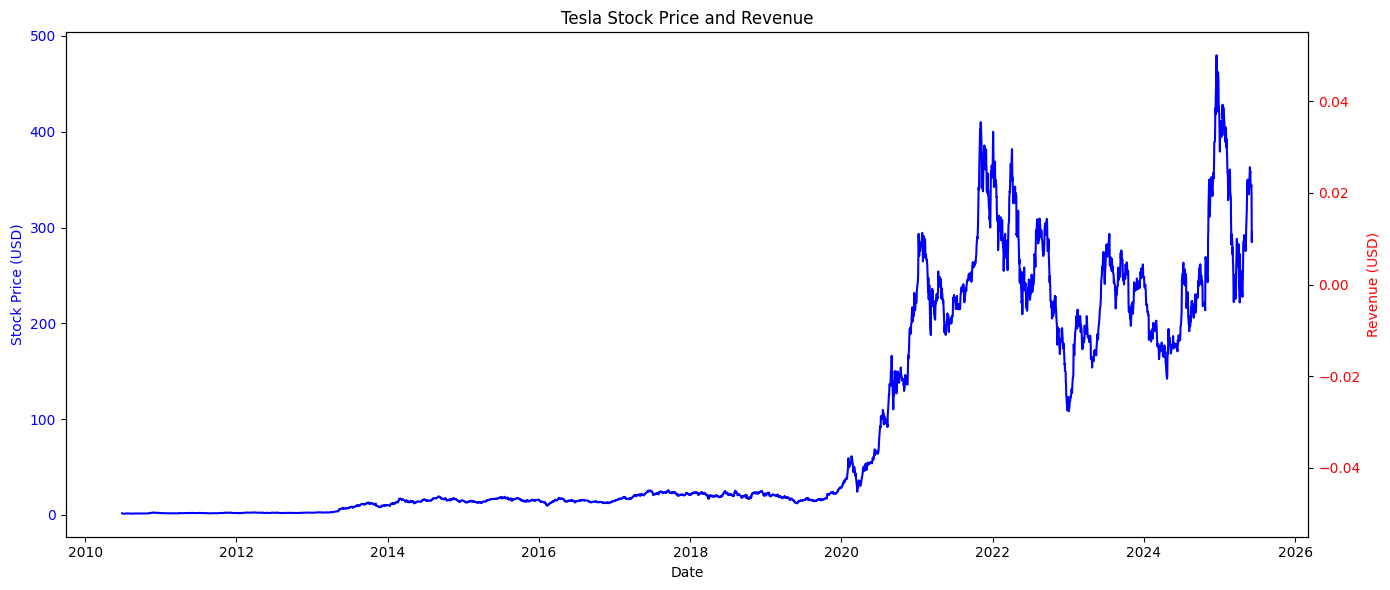

In [14]:
import matplotlib.pyplot as plt

# Define the make_graph function
def make_graph(stock_data, revenue_data, stock_name):
    fig, ax1 = plt.subplots(figsize=(14, 6))

    # Plot stock closing price
    ax1.plot(stock_data['Date'], stock_data['Close'], color='blue', label='Stock Price')
    ax1.set_xlabel("Date")
    ax1.set_ylabel("Stock Price (USD)", color='blue')
    ax1.tick_params(axis='y', labelcolor='blue')

    # Plot revenue on a second y-axis
    ax2 = ax1.twinx()
    ax2.plot(revenue_data['Date'], revenue_data['Revenue'], color='red', label='Revenue')
    ax2.set_ylabel("Revenue (USD)", color='red')
    ax2.tick_params(axis='y', labelcolor='red')

    # Title and layout
    plt.title(f"{stock_name} Stock Price and Revenue")
    fig.tight_layout()
    plt.show()

# Ensure data is sorted and properly formatted
tesla_data['Date'] = pd.to_datetime(tesla_data['Date'])
tesla_data.sort_values('Date', inplace=True)

tesla_revenue['Date'] = pd.to_datetime(tesla_revenue['Date'])
tesla_revenue.sort_values('Date', inplace=True)

# Call the function
make_graph(tesla_data, tesla_revenue, 'Tesla')


### **Question 6: Plot GameStop Stock Graph**

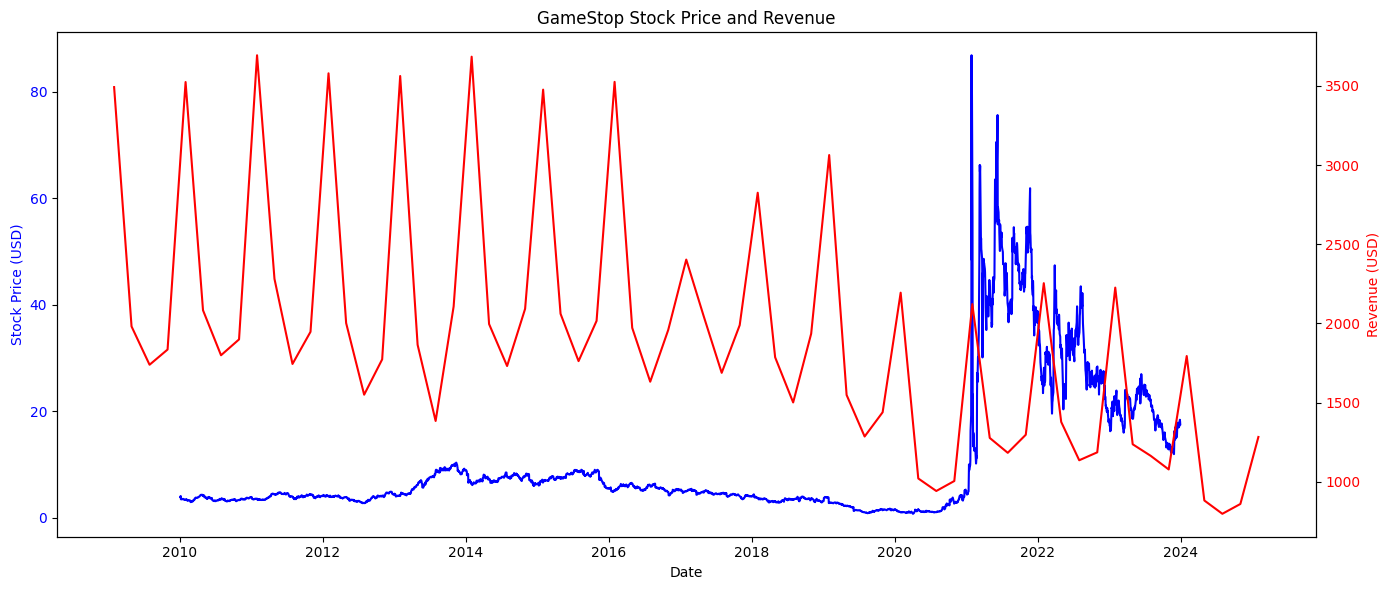

In [15]:
# Ensure required columns are datetime and sorted
gme_data['Date'] = pd.to_datetime(gme_data['Date'])
gme_data.sort_values('Date', inplace=True)

gme_revenue['Date'] = pd.to_datetime(gme_revenue['Date'])
gme_revenue.sort_values('Date', inplace=True)

# Reuse the same make_graph function from Question 5
make_graph(gme_data, gme_revenue, 'GameStop')
